In [1]:
from samana.Data.j0608 import J0608_MIRI
from samana.Model.j0608_model import J0608ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py

In [2]:
data = J0608_MIRI()
model = J0608ModelEPLM3M4Shear(data, shapelets_order=None)
kwargs_lens_macro_init = None

kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood
fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)

nthreads = 10
psf_symmetry = 1
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, [ 'a3_a','a1_a','a4_a'], [ 0.0, 0.0, 0.0]]]}],
    ['update_settings', {'lens_add_fixed': [[0, [ 'delta_phi_m1','delta_phi_m3', 'delta_phi_m4'], [0.0, 0.0, 0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 50, 'n_iterations': 100, 'threadCount': nthreads}],
       # ['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
    #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
    #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  2%|████▊                                                                                                                                                                                                                                           | 2/100 [00:01<01:23,  1.17it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  4%|█████████▌                                                                                                                                                                                                                                      | 4/100 [00:02<00:49,  1.95it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvem

Max iteration reached! Stopping.
-6.6313221264056095 reduced X^2 of best position
-2725.4733939527055 log likelihood
822 effective number of data points
[{'theta_E': 0.6615139228637378, 'gamma': 2.0677206957229974, 'e1': -0.3035928151292309, 'e2': 0.3016988095559169, 'center_x': -0.1439625672804055, 'center_y': -0.01727443175174314, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': -0.0636293771704916, 'gamma2': 0.08172961067336522, 'ra_0': 0.0, 'dec_0': 0.0}] lens result
[{'amp': 1, 'R_sersic': 0.0324824006901887, 'n_sersic': 6.736790938880555, 'e1': -0.2582666755852257, 'e2': -0.3822315948794102, 'center_x': -0.062155082815266535, 'center_y': -0.06872952238710511}] source result
[{'amp': 1, 'R_sersic': 0.90396330412068, 'n_sersic': 3.431822042226903, 'center_x': -0.19999549663396188, 'center_y': -0.09532165201585899}, {'amp': 1}] lens light result
[{'ra_image': array([-0.71403638, -0.10102376,  0.51329549, -0.55823535]),


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


-4.582341780052835 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  4.582341780052836
(19, ['gamma_lens0', 'gamma1_lens1', 'gamma2_lens1', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


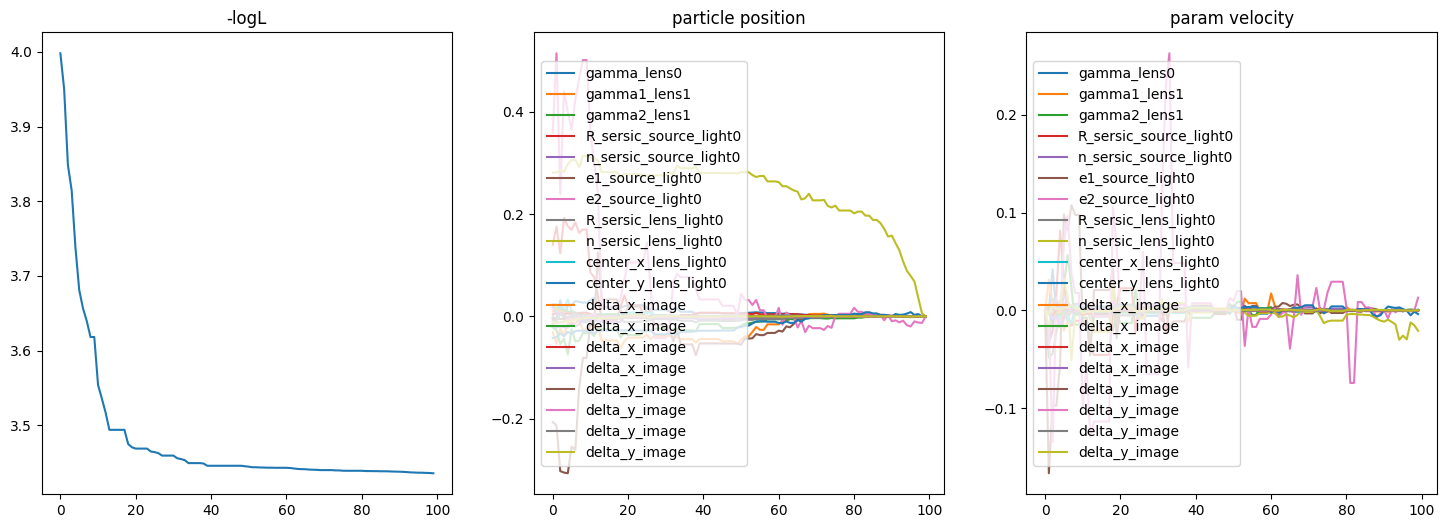

<Figure size 640x480 with 0 Axes>

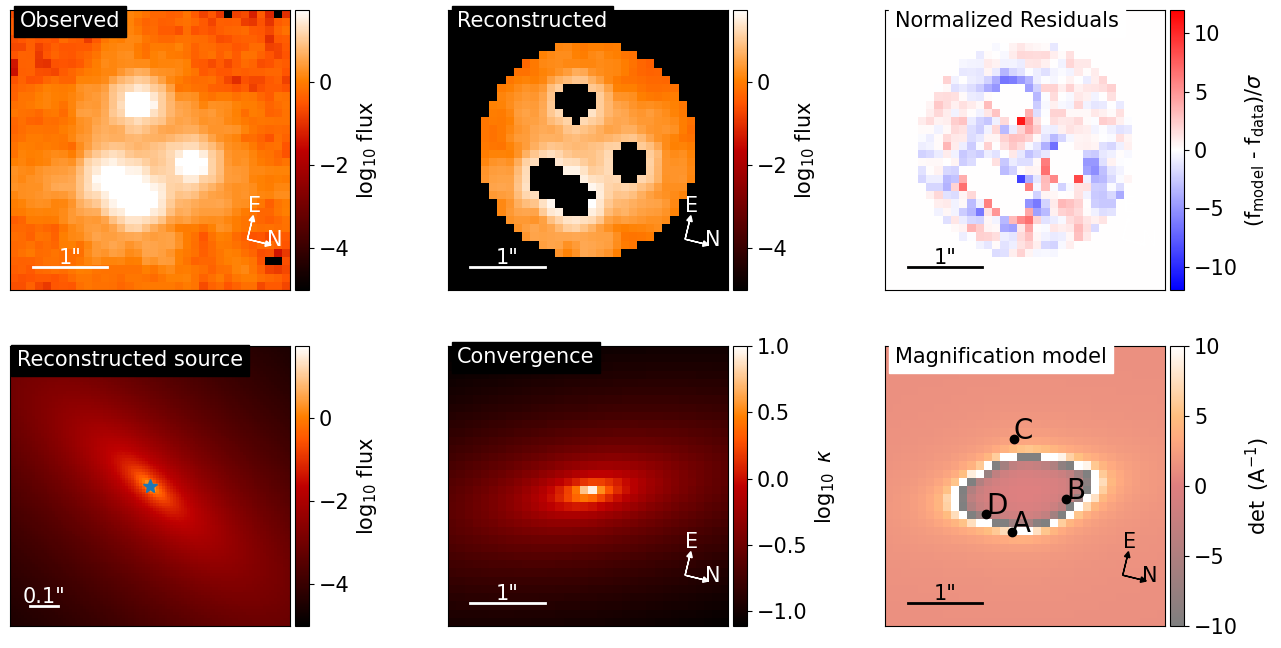

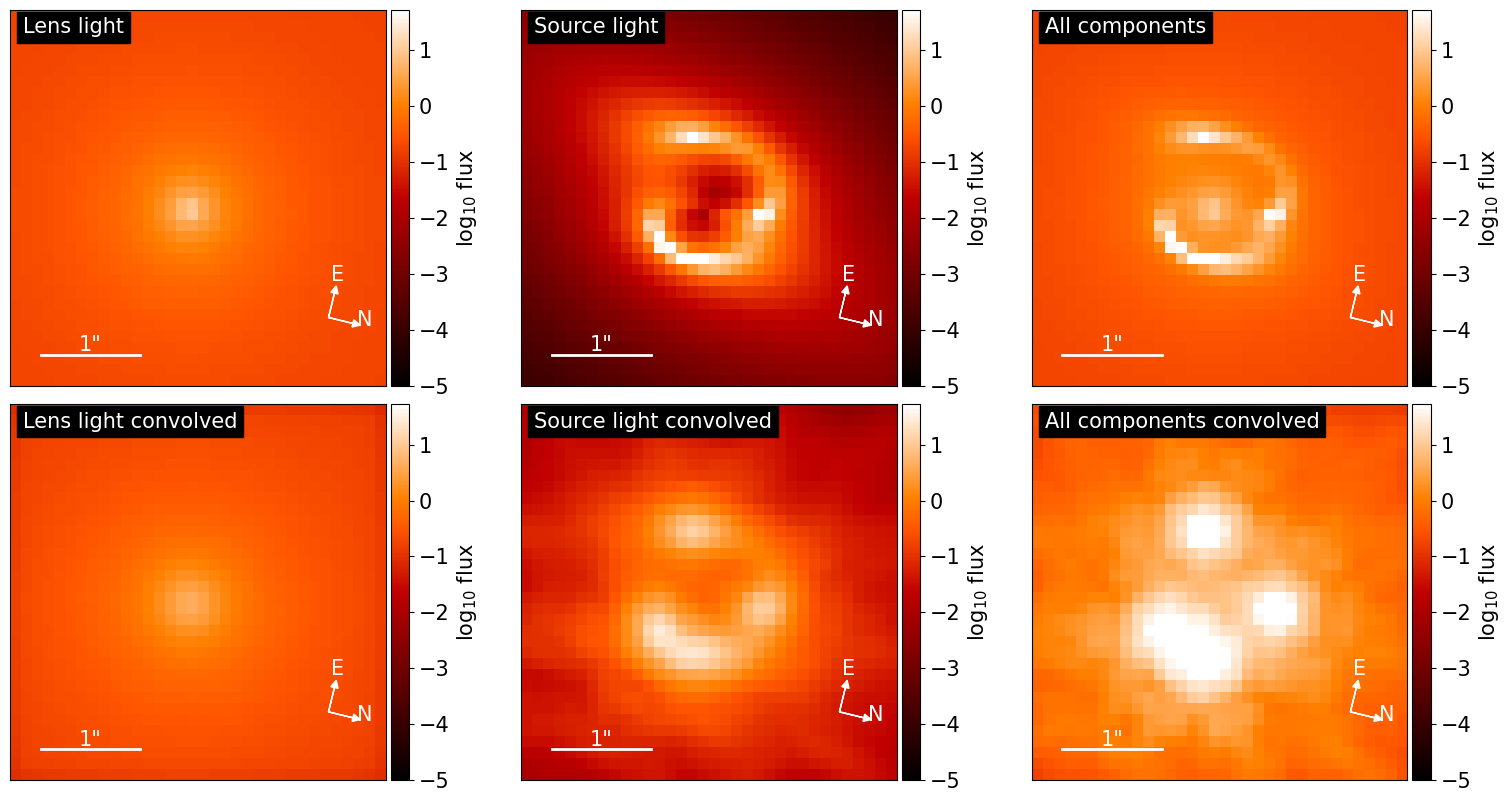

[{'theta_E': 0.6615139228637378, 'gamma': 2.0677206957229974, 'e1': -0.3035928151292309, 'e2': 0.3016988095559169, 'center_x': -0.1439625672804055, 'center_y': -0.01727443175174314, 'a1_a': 0.0, 'delta_phi_m1': 0.0, 'a3_a': 0.0, 'delta_phi_m3': 0.0, 'a4_a': 0.0, 'delta_phi_m4': 0.0}, {'gamma1': -0.0636293771704916, 'gamma2': 0.08172961067336522, 'ra_0': 0.0, 'dec_0': 0.0}]
[{'amp': 3194.4901112868765, 'R_sersic': 0.0324824006901887, 'n_sersic': 6.736790938880555, 'e1': -0.2582666755852257, 'e2': -0.3822315948794102, 'center_x': -0.062155082815266535, 'center_y': -0.06872952238710511}]
[{'amp': 20.327114516613083, 'R_sersic': 0.90396330412068, 'n_sersic': 3.431822042226903, 'center_x': -0.19999549663396188, 'center_y': -0.09532165201585899}, {'amp': 12.449724265388197}]
best fit flux ratios:  [0.27792537 0.36153805 0.53326763]
measured flux ratios:  [0.41 0.36 0.45]


In [3]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask_imaging_weights],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-12, v_max=12)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])

from lenstronomy.LensModel.lens_model import LensModel
lens_model = LensModel(kwargs_model['lens_model_list'], 
                      lens_redshift_list=kwargs_model['lens_redshift_list'], 
                      multi_plane=kwargs_model['multi_plane'], 
                      z_source=kwargs_model['z_source'])

ximg, yimg = data.x_image, data.y_image
m = np.absolute(lens_model.magnification(ximg, yimg, kwargs_result['kwargs_lens']))
print('best fit flux ratios: ', m[1:]/m[0])
print('measured flux ratios: ', np.array([0.41, 0.36, 0.45]))

0.1931471805599453
-4.582341780052835 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  4.582341780052836


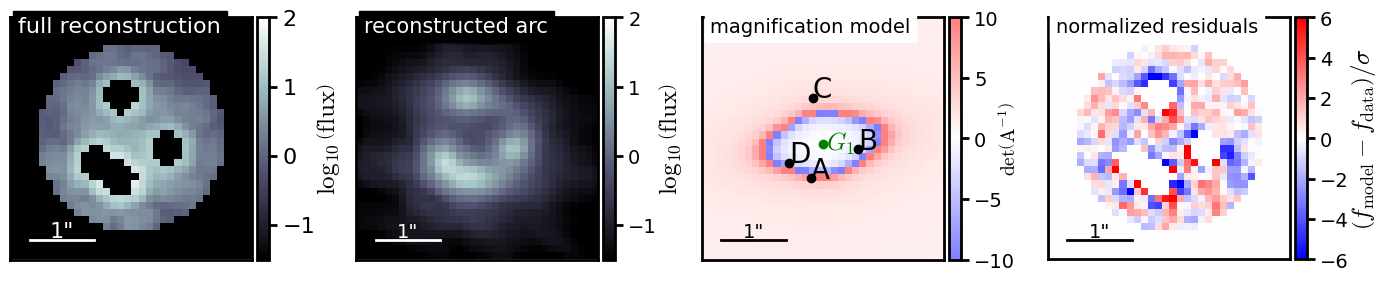

In [4]:
plt.rcParams['axes.linewidth'] = 2.
plt.rcParams['xtick.major.width'] = 2.
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.major.width'] = 2.0
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams.update({'font.size': 16})
plt.rcParams['mathtext.fontset'] = 'cm'
print((np.log(2) -0.5))

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="bone",
                      image_likelihood_mask_list=[data.likelihood_mask_imaging_weights],fast_caustic=True)

fig = plt.figure(1)
fig.set_size_inches(14,4.5)

ax1 = plt.subplot(141)
modelPlot._arrow_size = 0
v_min = -1.5
v_max = v_min + 3.5
modelPlot.model_plot(ax=ax1,
                    v_min=v_min,v_max=v_max,text='full reconstruction',font_size=16,no_arrow=True)
im = ax1.images
cb = im[-1].colorbar 
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)


ax2 = plt.subplot(142)
modelPlot._arrow_size = 0
modelPlot.decomposition_plot(ax=ax2, text='reconstructed arc', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone',
                             font_size=14,no_arrow=True)
im = ax2.images
cb = im[-1].colorbar 
#cb.set_ticklabels(ticks,fontsize=16)
cb.set_label(r'$\log_{10}\left(\rm{flux}\right)$',labelpad=0,fontsize=18)

ax3 = plt.subplot(143)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.magnification_plot(ax=ax3, cmap='bwr', text='magnification model', font_size=14,
                            no_arrow=True)
im = ax3.images
cb = im[-1].colorbar 
cb.set_label(r'$\rm{det}\left(A^{-1}\right)$',labelpad=-12)

satx = kwargs_result['kwargs_lens'][0]['center_x']
saty = kwargs_result['kwargs_lens'][0]['center_y']
xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
pixel_width = data.coordinate_system.pixel_width
origin = [0,0]
x_ = xplot * pixel_width + origin[0]
y_ = yplot * pixel_width + origin[1]
ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
ax3.text(x_+0.05, y_-0.1, r'$G_1$', fontsize=18, color='g')

# satx = kwargs_result['kwargs_lens'][2]['center_x']
# saty = kwargs_result['kwargs_lens'][2]['center_y']
# xplot, yplot = data.coordinate_system.map_coord2pix(satx, saty)
# pixel_width = data.coordinate_system.pixel_width
# origin = [0,0]
# x_ = xplot * pixel_width + origin[0]
# y_ = yplot * pixel_width + origin[1]
# ax3.plot(x_, y_, ".", color='g',markersize=12,alpha=1.)
# ax3.text(x_-0.2, y_-1., r'$G_2$', fontsize=18, color='g')


ax4 = plt.subplot(144)
modelPlot._arrow_size = 0
v_min = -3
v_max = v_min + 3.
modelPlot.normalized_residual_plot(ax=ax4,
                    cmap='bwr',font_size=14, text='normalized residuals')
im = ax4.images
cb = im[-1].colorbar 
cb.set_label(r'$\left(f_{\rm{model}}-f_{\rm{data}}\right)/\sigma$',labelpad=0,fontsize=18)

plt.subplots_adjust(wspace=-0.43, hspace=0.1)
plt.tight_layout()

#plt.savefig('../bmodel_figures/0608bmodel.pdf',bbox_inches='tight')

median:  -186.98159822717025
standard dev:  51.74389765641453


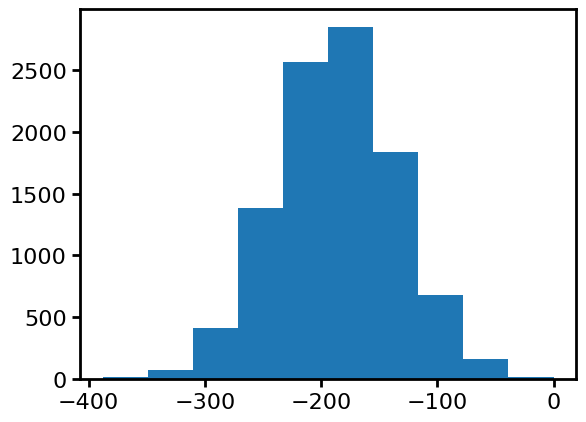

In [8]:
from lenstronomy.Util.class_creator import create_image_model 
import lenstronomy.Util.image_util as image_util

kwargs_data = data.kwargs_data
kwargs_psf = data.kwargs_psf
kwargs_numerics = data.kwargs_numerics 
image_model = create_image_model(kwargs_data, kwargs_psf, kwargs_numerics, kwargs_model)
likelihood_mask = data.likelihood_mask_imaging_weights
image_sim_no_noise = image_model.image(kwargs_result['kwargs_lens'], 
                              kwargs_result['kwargs_source'], 
                              kwargs_result['kwargs_lens_light'], 
                              kwargs_result['kwargs_ps'])
logL_list = []
model_error = image_model._error_map_model(
            kwargs_result['kwargs_lens'], kwargs_ps=kwargs_result['kwargs_ps'], kwargs_special=kwargs_result['kwargs_special']
        )


for i in range(0, 10000):
    poisson_noise = image_util.add_poisson(image_sim_no_noise, exp_time=54)
    poisson_noise = 0
    bkg = image_util.add_background(image_sim_no_noise, sigma_bkd=0.21)
    noise_map = bkg + poisson_noise
    #plt.imshow(noise_map);plt.show();a=input('cont')
    image_sim = image_sim_no_noise + noise_map
    logL = image_model.Data.log_likelihood(image_sim_no_noise + noise_map, likelihood_mask, model_error)
    #print(logL)
    logL_list.append(logL)
    
max_logL = np.max(logL_list)
logL_list = np.array(logL_list) - max_logL
_ = plt.hist(logL_list)
print('median: ', np.median(logL_list))
print('standard dev: ', np.std(logL_list))

In [6]:
#np.savetxt('../miri_psf_reconstructions/j0608.txt', X=fitting_sequence.multi_band_list[0][1]['kernel_point_source'])